# Trip Duration Model
Using the [NYC Taxis Data](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page), Yellow taxi dataset for January and February 2022

This is for the course and the week 1 submission

In [26]:
# standard data analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# sklearn imports
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [27]:
# saving models
import pickle

In [3]:
yellow_jan = pd.read_parquet('../data/yellow_tripdata_2022-01.parquet')

In [4]:
yellow_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


Homework Q1: 19 columns

In [6]:
# check column data types
yellow_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [9]:
# add duration column and convert it to minutes (numerical dtype)
yellow_jan['duration'] = yellow_jan['tpep_dropoff_datetime'] - yellow_jan['tpep_pickup_datetime']
yellow_jan['duration'] = yellow_jan['duration'].apply(lambda td: td.total_seconds() / 60)

In [13]:
yellow_jan.describe()['duration']

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: duration, dtype: float64

Homework Q2: Standard Deviation is 46.45 minutes

In [14]:
# keep only ride records between 1 and 60 minutes, inclusive
yellow_jan = yellow_jan[(yellow_jan['duration'] >= 1) & (yellow_jan['duration'] <= 60)]

In [17]:
# fraction that remained after dropping outliers
# number of rows in new dataset / number in the original dataset
(2421440 / 2463931) * 100

98.27547930522405

Homework Q3: 98%

In [34]:
# set categorial columns for one-hot encoding
categorical = ['PULocationID', 'DOLocationID']
yellow_jan[categorical] = yellow_jan[categorical].astype(str)

/tmp/ipykernel_6161/3036095224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_jan[categorical] = yellow_jan[categorical].astype(str)


In [38]:
# turns the df into a giant list of dictionaries
train_dicts = yellow_jan[categorical].to_dict(orient='records')

In [39]:
# using the Dictionary Vectorizer from sklearn
dv = DictVectorizer()

# training feature matrix
X_train = dv.fit_transform(train_dicts)

In [40]:
X_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

Homework Q4: 515 columns after one-hot encoding

In [41]:
# target vector
target = 'duration'
y_train = yellow_jan[target].values

In [43]:
# train a basic linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# get predictions
y_pred = lr.predict(X_train)

In [44]:
# evaluation
mean_squared_error(y_train, y_pred, squared=False)

6.9861901359801575

Homework Q5: RMSE = ~6.99

/home/dan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


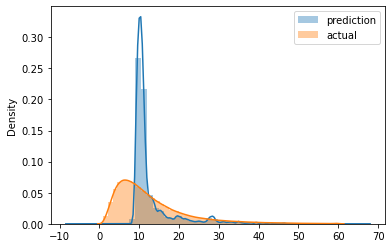

In [45]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [53]:
# create a processing function to reformat the input data
def process_taxis(filename):
    df = pd.read_parquet(f'../data/{filename}')

    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [54]:
# bring in the february data for validation
yellow_feb = process_taxis('yellow_tripdata_2022-02.parquet')


In [57]:
# turn categorical columns into list of dicts
val_dicts = yellow_feb[categorical].to_dict(orient='records')

In [58]:
# validation feature matrix
X_val = dv.transform(val_dicts)

# validation target matrix
y_val = yellow_feb['duration'].values

In [63]:
# predictions for the validation set
y_pred = lr.predict(X_val)

In [64]:
mean_squared_error(y_val, y_pred, squared=False)

7.786389479810605

Homework Q6: RMSE for the validation set is 7.79